### 2010-2017 NBA Stats to find best basketball shooters for Los Angeles Lakers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [2]:
#Obtain the data
stats = pd.read_csv('Seasons_Stats.csv')

In [3]:
#Preview the data
stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [4]:
#There are alot of columns(53), let use our domain knowledge and only keep columns that will be useful to us.
cols = ['Year','Player','Pos','TS%','3P','3PA','3P%','3PAr','FT','FTA','FT%','FTr','PTS']
stats[cols].head()

,Year,Player,Pos,TS%,3P,3PA,3P%,3PAr,FT,FTA,FT%,FTr,PTS
0,1950.0,Curly Armstrong,G-F,0.368,NaN,NaN,NaN,NaN,170.0,241.0,0.705,0.467,458.0
1,1950.0,Cliff Barker,SG,0.435,NaN,NaN,NaN,NaN,75.0,106.0,0.708,0.387,279.0
2,1950.0,Leo Barnhorst,SF,0.394,NaN,NaN,NaN,NaN,90.0,129.0,0.698,0.259,438.0
3,1950.0,Ed Bartels,F,0.312,NaN,NaN,NaN,NaN,19.0,34.0,0.559,0.395,63.0
4,1950.0,Ed Bartels,F,0.308,NaN,NaN,NaN,NaN,17.0,31.0,0.548,0.378,59.0


#### Let's see how data can help us answer many questions we may have!

###### Top 50 best three point shooters from the year 2010 to 2017

In [5]:
#Only view data from 2010 and on.
recentThree = stats[stats['Year'] >= 2010]
recentThree = recentThree[cols]

In [6]:
#These are the columns we will be working with
recentThree.head()

,Year,Player,Pos,TS%,3P,3PA,3P%,3PAr,FT,FTA,FT%,FTr,PTS
19922,2010.0,Arron Afflalo,SG,0.576,108.0,249.0,0.434,0.426,72.0,98.0,0.735,0.168,724.0
19923,2010.0,Alexis Ajinca,C,0.479,0.0,0.0,NaN,0.000,0.0,1.0,0.000,0.100,10.0
19924,2010.0,LaMarcus Aldridge,PF,0.535,5.0,16.0,0.313,0.014,230.0,304.0,0.757,0.260,1393.0
19925,2010.0,Joe Alexander,SF,0.273,0.0,1.0,0.000,0.167,2.0,3.0,0.667,0.500,4.0
19926,2010.0,Malik Allen,PF,0.431,1.0,6.0,0.167,0.052,12.0,13.0,0.923,0.112,105.0


In [7]:
#Let's get the columns in the correct datatype
recentThree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4762 entries, 19922 to 24690
Data columns (total 13 columns):
Year      4762 non-null float64
Player    4762 non-null object
Pos       4762 non-null object
TS%       4738 non-null float64
3P        4762 non-null float64
3PA       4762 non-null float64
3P%       4085 non-null float64
3PAr      4738 non-null float64
FT        4762 non-null float64
FTA       4762 non-null float64
FT%       4560 non-null float64
FTr       4738 non-null float64
PTS       4762 non-null float64
dtypes: float64(11), object(2)
memory usage: 520.8+ KB


In [8]:
#View the data
recentThree.head(2)

,Year,Player,Pos,TS%,3P,3PA,3P%,3PAr,FT,FTA,FT%,FTr,PTS
19922,2010.0,Arron Afflalo,SG,0.576,108.0,249.0,0.434,0.426,72.0,98.0,0.735,0.168,724.0
19923,2010.0,Alexis Ajinca,C,0.479,0.0,0.0,NaN,0.000,0.0,1.0,0.000,0.100,10.0


In [9]:
#Convert year, 3p ,3pa, ft, fta, pts to integer because those are numbers
recentThree['Year'] = recentThree['Year'].astype('int64')
recentThree['3P'] = recentThree['3P'].astype('int64')
recentThree['3PA'] = recentThree['3PA'].astype('int64')
recentThree['FT'] = recentThree['FT'].astype('int64')
recentThree['FTA'] = recentThree['FTA'].astype('int64')
recentThree['PTS'] = recentThree['PTS'].astype('int64')

recentThree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4762 entries, 19922 to 24690
Data columns (total 13 columns):
Year      4762 non-null int64
Player    4762 non-null object
Pos       4762 non-null object
TS%       4738 non-null float64
3P        4762 non-null int64
3PA       4762 non-null int64
3P%       4085 non-null float64
3PAr      4738 non-null float64
FT        4762 non-null int64
FTA       4762 non-null int64
FT%       4560 non-null float64
FTr       4738 non-null float64
PTS       4762 non-null int64
dtypes: float64(5), int64(6), object(2)
memory usage: 520.8+ KB


In [10]:
#Check how the data looks after the conversion
recentThree.head()

,Year,Player,Pos,TS%,3P,3PA,3P%,3PAr,FT,FTA,FT%,FTr,PTS
19922,2010,Arron Afflalo,SG,0.576,108,249,0.434,0.426,72,98,0.735,0.168,724
19923,2010,Alexis Ajinca,C,0.479,0,0,NaN,0.000,0,1,0.000,0.100,10
19924,2010,LaMarcus Aldridge,PF,0.535,5,16,0.313,0.014,230,304,0.757,0.260,1393
19925,2010,Joe Alexander,SF,0.273,0,1,0.000,0.167,2,3,0.667,0.500,4
19926,2010,Malik Allen,PF,0.431,1,6,0.167,0.052,12,13,0.923,0.112,105


In [11]:
#View players with atleast 100 3-point shots taken
recentThree[recentThree['3PA'] >= 100].sort_values('3P%', ascending=False).head(50)

,Year,Player,Pos,TS%,3P,3PA,3P%,3PAr,FT,FTA,FT%,FTr,PTS
24274,2017,Pau Gasol,C,0.578,56,104,0.538,0.172,130,184,0.707,0.305,792
20238,2010,Kyle Korver,SG,0.620,59,110,0.536,0.393,39,49,0.796,0.175,374
22897,2015,Luke Babbitt,SF,0.639,59,115,0.513,0.599,13,19,0.684,0.099,256
23196,2015,Kyle Korver,SG,0.699,221,449,0.492,0.748,106,118,0.898,0.197,911
24399,2017,Kyle Korver,SG,0.677,97,200,0.485,0.743,14,15,0.933,0.056,373
23634,2016,Troy Daniels,SG,0.634,59,122,0.484,0.652,5,9,0.556,0.048,242
20306,2010,Mike Miller,SG,0.623,82,171,0.480,0.395,70,85,0.824,0.196,586
20103,2010,Daniel Gibson,PG,0.613,71,149,0.477,0.556,34,49,0.694,0.183,355
23961,2016,J.J. Redick,SG,0.632,200,421,0.475,0.478,182,205,0.888,0.233,1226
21504,2012,Steve Novak,PF,0.684,133,282,0.472,0.837,22,26,0.846,0.077,477


- Lakers should target those names above because they have been top 50, 3 point shooters from 2010 to 2017.
- However, not everyone is going to be available. They might be out of the league or under contract with another team.
- Some players are on there multiple times because their 3 point percentage have been great for multiple seasons or they ended up getting traded, which is why their 3 point percentage are shown for multiple team in the same season.   

##### Top 10 with the most 3 point field goal attempts

In [12]:
recentThree.sort_values(['3PA','3P%'], ascending=False).head(10)

,Year,Player,Pos,TS%,3P,3PA,3P%,3PAr,FT,FTA,FT%,FTr,PTS
23633,2016,Stephen Curry,PG,0.669,402,886,0.454,0.554,363,400,0.908,0.250,2375
24216,2017,Stephen Curry,PG,0.624,324,789,0.411,0.547,325,362,0.898,0.251,1999
24306,2017,James Harden,PG,0.613,262,756,0.347,0.493,746,881,0.847,0.575,2356
24290,2017,Eric Gordon,SG,0.557,246,661,0.372,0.651,147,175,0.840,0.172,1217
23722,2016,James Harden,SG,0.598,236,657,0.359,0.406,720,837,0.860,0.518,2376
24033,2016,Klay Thompson,SG,0.597,276,650,0.425,0.469,193,221,0.873,0.159,1771
24617,2017,Klay Thompson,SG,0.592,268,647,0.414,0.470,186,218,0.853,0.158,1742
23000,2015,Stephen Curry,PG,0.638,286,646,0.443,0.482,308,337,0.914,0.251,1900
24612,2017,Isaiah Thomas,PG,0.625,245,646,0.379,0.439,590,649,0.909,0.441,2199
22402,2014,Stephen Curry,PG,0.610,261,615,0.424,0.445,308,348,0.885,0.252,1873


- Stephen Curry, James Harden, and Klay Thompson takes many 3 point shots through-out multiple seasons. 
- That got me thinking, if you take many 3-point field goal attempts, does that mean you will have higher 3-point field goal percentage? 

##### Any correlation between 3-Point Field Goal Attempts and 3-Point Field Goal Percentage with at least 100 attempts?

C:\Users\Miraj-PC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


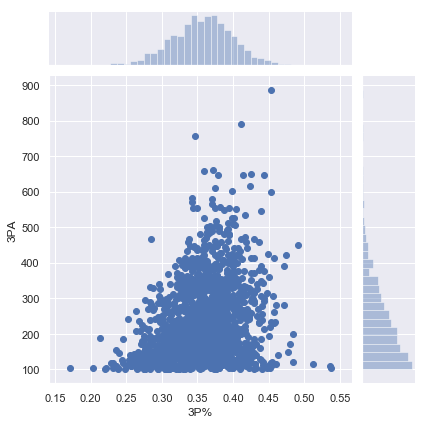

In [13]:
sns.jointplot(x='3P%', y='3PA', data=recentThree[recentThree['3PA'] > 99]) 

In [14]:
recentThree[recentThree['3PA'] > 99][['3P%','3PA']].corr()

,3P%,3PA
3P%,1.000000,0.272636
3PA,0.272636,1.000000


- There is very little, if any correlation between those two.

##### Best free-throw shooters with at least 75 taken?

In [15]:
recentThree[recentThree['FTA'] >= 75].sort_values('FT%', ascending=False).head(50)

,Year,Player,Pos,TS%,3P,3PA,3P%,3PAr,FT,FTA,FT%,FTr,PTS
22724,2014,Brian Roberts,PG,0.529,64,178,0.360,0.306,125,133,0.940,0.229,677
20593,2011,Aaron Brooks,PG,0.465,48,169,0.284,0.437,78,83,0.940,0.214,394
20323,2010,Steve Nash,PG,0.615,124,291,0.426,0.295,211,225,0.938,0.228,1333
20654,2011,Stephen Curry,PG,0.595,151,342,0.442,0.325,212,227,0.934,0.216,1373
24153,2017,Bojan Bogdanovic,SF,0.617,45,115,0.391,0.491,71,76,0.934,0.325,330
21493,2012,Anthony Morrow,SG,0.531,106,286,0.371,0.435,97,104,0.933,0.158,747
21232,2012,Jamal Crawford,PG,0.506,80,260,0.308,0.353,191,206,0.927,0.280,837
22581,2014,Kyle Korver,SG,0.653,185,392,0.472,0.644,87,94,0.926,0.154,850
20274,2010,Kevin Martin,SG,0.586,31,100,0.310,0.282,171,185,0.924,0.523,510
20571,2011,Chauncey Billups,PG,0.634,105,238,0.441,0.444,265,287,0.923,0.535,840


- Los Angles Lakers should target those names above because they have been top 50, free throw shooters from 2010 to 2017.
- Again, not everyone is going to be available. They might be retired, out of the league or under contract with another team.
- Lastly, some players are on there multiple times because their free throw percentage have been good for multiple seasons or they ended up getting traded, which is why their free throw percentage are shown for multiple team in the same season.  

##### Is it fair to assume, if a player is good Free Throw shooter will likely be a good 3-Point shooter?

In [16]:
recentThree[(recentThree['3PA'] >= 100) | (recentThree['FT%'] >= 75)].head(5)

,Year,Player,Pos,TS%,3P,3PA,3P%,3PAr,FT,FTA,FT%,FTr,PTS
19922,2010,Arron Afflalo,SG,0.576,108,249,0.434,0.426,72,98,0.735,0.168,724
19927,2010,Ray Allen,SG,0.601,145,399,0.363,0.410,231,253,0.913,0.260,1304
19929,2010,Rafer Alston,PG,0.443,58,168,0.345,0.377,59,81,0.728,0.182,427
19936,2010,Ryan Anderson,PF,0.574,78,211,0.370,0.544,71,82,0.866,0.211,487
19937,2010,Carmelo Anthony,SF,0.548,59,187,0.316,0.125,508,612,0.830,0.407,1943


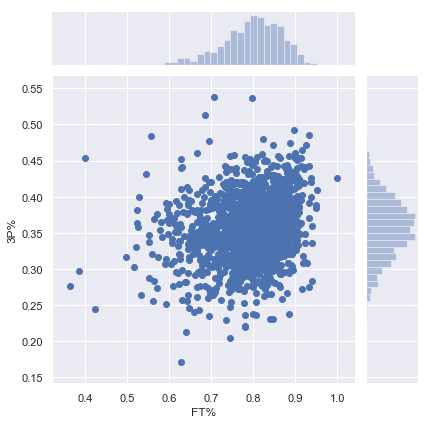

In [17]:
sns.jointplot(x='FT%', y='3P%', data=recentThree[(recentThree['3PA'] >= 100) | (recentThree['FT%'] >= 75)])

In [18]:
recentThree[(recentThree['3PA'] >= 100) | (recentThree['FT%'] >= 75)][['FT%','3PA']].corr()

,FT%,3PA
FT%,1.000000,0.227107
3PA,0.227107,1.000000


- There is very little, if any correlation between those Free Throw shooters and 3-Point shooters.
- It is fair to assume there will be relationship between those two based on logic; however, data proves there is no relationship between them.

### Best available free agents for Los Angeles Lakers to sign

In [19]:
#import new dataset with 2019 free agency status
freeAgents = pd.read_csv('NBA2019FreeAgents.csv')
freeAgents.head()

,Unnamed: 0,Player,Option,Team2018_2019,Agent
0,0,Kevin Durant,Player Option,Golden State Warriors,Rich Kleiman
1,1,Kawhi Leonard,Player Option,Toronto Raptors,Dennis Robertson
2,2,Kyrie Irving,Player Option,Boston Celtics,Jeff Wechsler
3,3,Kemba Walker,Unrestricted,Charlotte Hornets,Jeff Schwartz
4,4,Klay Thompson,Unrestricted,Golden State Warriors,Greg Lawrence


In [20]:
#Lets rename the column, 'Team2018_2019' to 'Current Team(2018-2019)'
freeAgents.rename(columns={'Team2018_2019':'Current Team(2018-2019)'}, inplace=True)
freeAgents.head(2)

,Unnamed: 0,Player,Option,Current Team(2018-2019),Agent
0,0,Kevin Durant,Player Option,Golden State Warriors,Rich Kleiman
1,1,Kawhi Leonard,Player Option,Toronto Raptors,Dennis Robertson


In [21]:
#Drop unnecessary columns 
freeAgents.drop(columns='Unnamed: 0', inplace=True)

In [22]:
#Check for null values and make sure all the data types are in correct format
freeAgents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
Player                     70 non-null object
Option                     70 non-null object
Current Team(2018-2019)    70 non-null object
Agent                      70 non-null object
dtypes: object(4)
memory usage: 2.3+ KB


In [23]:
#Combine two datasets on player column
df = recentThree.merge(freeAgents, on='Player')
df.head(10)

,Year,Player,Pos,TS%,3P,3PA,3P%,3PAr,FT,FTA,FT%,FTr,PTS,Option,Current Team(2018-2019),Agent
0,2010,Trevor Ariza,SF,0.488,136,407,0.334,0.407,148,228,0.649,0.228,1072,Unrestricted,Washington Wizards,Steve Heumann
1,2011,Trevor Ariza,SF,0.487,82,271,0.303,0.356,138,197,0.701,0.259,826,Unrestricted,Washington Wizards,Steve Heumann
2,2012,Trevor Ariza,SF,0.496,29,87,0.333,0.216,79,102,0.775,0.253,444,Unrestricted,Washington Wizards,Steve Heumann
3,2013,Trevor Ariza,SF,0.538,76,209,0.364,0.463,78,95,0.821,0.211,530,Unrestricted,Washington Wizards,Steve Heumann
4,2014,Trevor Ariza,SF,0.590,180,442,0.407,0.518,149,193,0.772,0.226,1107,Unrestricted,Washington Wizards,Steve Heumann
5,2015,Trevor Ariza,SF,0.539,194,555,0.350,0.610,122,143,0.853,0.157,1048,Unrestricted,Washington Wizards,Steve Heumann
6,2016,Trevor Ariza,SF,0.551,185,499,0.371,0.581,126,161,0.783,0.187,1025,Unrestricted,Washington Wizards,Steve Heumann
7,2017,Trevor Ariza,SF,0.548,191,555,0.344,0.695,93,126,0.738,0.158,936,Unrestricted,Washington Wizards,Steve Heumann
8,2010,Darren Collison,PG,0.546,46,115,0.400,0.146,148,174,0.851,0.221,946,Unrestricted,Indiana Pacers,Bill Duffy
9,2011,Darren Collison,PG,0.534,41,124,0.331,0.143,202,232,0.871,0.267,1039,Unrestricted,Indiana Pacers,Bill Duffy


In [24]:
#Only keep most recent season stats
df.drop_duplicates(subset='Player', keep='last', inplace=True)
df.head()

,Year,Player,Pos,TS%,3P,3PA,3P%,3PAr,FT,FTA,FT%,FTr,PTS,Option,Current Team(2018-2019),Agent
7,2017,Trevor Ariza,SF,0.548,191,555,0.344,0.695,93,126,0.738,0.158,936,Unrestricted,Washington Wizards,Steve Heumann
15,2017,Darren Collison,PG,0.570,73,175,0.417,0.245,147,171,0.860,0.239,900,Unrestricted,Indiana Pacers,Bill Duffy
27,2017,Goran Dragic,PG,0.575,117,289,0.405,0.257,298,377,0.790,0.335,1483,Player Option,Miami Heat,Rade Filipovich
35,2017,Kevin Durant,SF,0.651,117,312,0.375,0.304,336,384,0.875,0.374,1555,Player Option,Golden State Warriors,Rich Kleiman
45,2017,Tyreke Evans,SF,0.516,21,48,0.438,0.336,24,34,0.706,0.238,163,Unrestricted,Indiana Pacers,Darren ‘Mats’ Matsubara


##### Best Three Point Shooters available to sign in 2019 Free Agency

In [25]:
df.sort_values(by=['3P%','3PA'], ascending=False, inplace=True)
df.head()

,Year,Player,Pos,TS%,3P,3PA,3P%,3PAr,FT,FTA,FT%,FTr,PTS,Option,Current Team(2018-2019),Agent
75,2017,Taj Gibson,PF,0.528,1,1,1.000,0.006,28,39,0.718,0.218,207,Unrestricted,Minnesota Timberwolves,Mark Bartelstein
387,2017,Jonas Valanciunas,C,0.601,1,2,0.500,0.003,176,217,0.811,0.309,959,Player Option,Memphis Grizzlies,Leon Rose
397,2017,Allen Crabbe,SG,0.602,134,302,0.444,0.467,105,124,0.847,0.192,845,Player Option,Brooklyn Nets,Aaron Mintz
45,2017,Tyreke Evans,SF,0.516,21,48,0.438,0.336,24,34,0.706,0.238,163,Unrestricted,Indiana Pacers,Darren ‘Mats’ Matsubara
368,2017,Khris Middleton,SF,0.570,45,104,0.433,0.312,81,92,0.880,0.276,426,Player Option,Milwaukee Bucks,Michael Lindeman


Notice: 
- There are many players who have only attempted few three point shots, which is why there average 3-point percentage is high.
- Let's eliminate them because we do not have 'strong' sample on them.

##### Best 3-Point shooter available with atleast 100 three point shots taken?

In [26]:
df[df['3PA'] >= 100]

,Year,Player,Pos,TS%,3P,3PA,3P%,3PAr,FT,FTA,FT%,FTr,PTS,Option,Current Team(2018-2019),Agent
397,2017,Allen Crabbe,SG,0.602,134,302,0.444,0.467,105,124,0.847,0.192,845,Player Option,Brooklyn Nets,Aaron Mintz
368,2017,Khris Middleton,SF,0.570,45,104,0.433,0.312,81,92,0.880,0.276,426,Player Option,Milwaukee Bucks,Michael Lindeman
15,2017,Darren Collison,PG,0.570,73,175,0.417,0.245,147,171,0.860,0.239,900,Unrestricted,Indiana Pacers,Bill Duffy
329,2017,Klay Thompson,SG,0.592,268,647,0.414,0.470,186,218,0.853,0.158,1742,Unrestricted,Golden State Warriors,Greg Lawrence
27,2017,Goran Dragic,PG,0.575,117,289,0.405,0.257,298,377,0.790,0.335,1483,Player Option,Miami Heat,Rade Filipovich
430,2017,Malcolm Brogdon,SG,0.555,78,193,0.404,0.304,109,126,0.865,0.198,767,Restricted,Milwaukee Bucks,Danielle Cantor
279,2017,Kyrie Irving,PG,0.580,177,441,0.401,0.311,297,328,0.905,0.231,1816,Player Option,Boston Celtics,Jeff Wechsler
341,2017,Kemba Walker,PG,0.569,240,602,0.399,0.415,304,359,0.847,0.248,1830,Unrestricted,Charlotte Hornets,Jeff Schwartz
402,2017,Bojan Bogdanovic,SF,0.617,45,115,0.391,0.491,71,76,0.934,0.325,330,Unrestricted,Indiana Pacers,Jason Ranne
53,2017,Marc Gasol,C,0.554,104,268,0.388,0.231,278,332,0.837,0.286,1446,Player Option,Toronto Raptors,Steve Heumann


- Los Angeles Lakers should target those players from top to bottom, if they want to improve their team's Three Point percentage. 
- Note: the data is from 2017-2018 NBA season.

##### Best Free-Throw Shooters available to sign in 2019 Free Agency

In [27]:
df.sort_values(by='FT%', ascending=False).head()

,Year,Player,Pos,TS%,3P,3PA,3P%,3PAr,FT,FTA,FT%,FTr,PTS,Option,Current Team(2018-2019),Agent
402,2017,Bojan Bogdanovic,SF,0.617,45,115,0.391,0.491,71,76,0.934,0.325,330,Unrestricted,Indiana Pacers,Jason Ranne
323,2017,Isaiah Thomas,PG,0.625,245,646,0.379,0.439,590,649,0.909,0.441,2199,Unrestricted,Denver Nuggets,Sam Goldfeder
279,2017,Kyrie Irving,PG,0.580,177,441,0.401,0.311,297,328,0.905,0.231,1816,Player Option,Boston Celtics,Jeff Wechsler
315,2017,Ricky Rubio,PG,0.539,60,196,0.306,0.302,254,285,0.891,0.438,836,Unrestricted,Utah Jazz,Jeff Schwartz
293,2017,Kawhi Leonard,SF,0.611,147,386,0.381,0.294,469,533,0.880,0.407,1888,Player Option,Toronto Raptors,Dennis Robertson


##### Best Free-Throw shooters available with atleast 75 shots taken?

In [28]:
df[df['FTA'] >= 75].sort_values(by=['FT%','FTA'], ascending=False)

,Year,Player,Pos,TS%,3P,3PA,3P%,3PAr,FT,FTA,FT%,FTr,PTS,Option,Current Team(2018-2019),Agent
402,2017,Bojan Bogdanovic,SF,0.617,45,115,0.391,0.491,71,76,0.934,0.325,330,Unrestricted,Indiana Pacers,Jason Ranne
323,2017,Isaiah Thomas,PG,0.625,245,646,0.379,0.439,590,649,0.909,0.441,2199,Unrestricted,Denver Nuggets,Sam Goldfeder
279,2017,Kyrie Irving,PG,0.580,177,441,0.401,0.311,297,328,0.905,0.231,1816,Player Option,Boston Celtics,Jeff Wechsler
315,2017,Ricky Rubio,PG,0.539,60,196,0.306,0.302,254,285,0.891,0.438,836,Unrestricted,Utah Jazz,Jeff Schwartz
293,2017,Kawhi Leonard,SF,0.611,147,386,0.381,0.294,469,533,0.880,0.407,1888,Player Option,Toronto Raptors,Dennis Robertson
368,2017,Khris Middleton,SF,0.570,45,104,0.433,0.312,81,92,0.880,0.276,426,Player Option,Milwaukee Bucks,Michael Lindeman
35,2017,Kevin Durant,SF,0.651,117,312,0.375,0.304,336,384,0.875,0.374,1555,Player Option,Golden State Warriors,Rich Kleiman
181,2017,Derrick Rose,PG,0.530,13,60,0.217,0.061,221,253,0.874,0.259,1154,Unrestricted,Minnesota Timberwolves,BJ Armstrong
197,2017,Marvin Williams,PF,0.551,124,354,0.350,0.503,131,150,0.873,0.213,849,Player Option,Charlotte Hornets,Jim Tanner
189,2017,Jeff Teague,PG,0.574,90,252,0.357,0.277,360,415,0.867,0.457,1254,Player Option,Minnesota Timberwolves,JR Hensley


- Los Angeles Lakers should target those players from top to bottom, if they want to improve their team's Free-Throw percentage. 
- Note: the data is from 2017-2018 NBA season.

### Above average 3-Point shooters as well as above average Free-Throw shooters

##### Average of free throw shooters, who have taken atleast 75 shots.

In [29]:
df[df['FTA'] >= 75]['FT%'].mean()

0.7801754385964911

##### Therefore, anything above 78% will be considered above average.

In [30]:
df[(df['FTA'] >= 75) & (df['FT%'] >=.78)].sort_values(by=['FT%','FTA'], ascending=False)

,Year,Player,Pos,TS%,3P,3PA,3P%,3PAr,FT,FTA,FT%,FTr,PTS,Option,Current Team(2018-2019),Agent
402,2017,Bojan Bogdanovic,SF,0.617,45,115,0.391,0.491,71,76,0.934,0.325,330,Unrestricted,Indiana Pacers,Jason Ranne
323,2017,Isaiah Thomas,PG,0.625,245,646,0.379,0.439,590,649,0.909,0.441,2199,Unrestricted,Denver Nuggets,Sam Goldfeder
279,2017,Kyrie Irving,PG,0.580,177,441,0.401,0.311,297,328,0.905,0.231,1816,Player Option,Boston Celtics,Jeff Wechsler
315,2017,Ricky Rubio,PG,0.539,60,196,0.306,0.302,254,285,0.891,0.438,836,Unrestricted,Utah Jazz,Jeff Schwartz
293,2017,Kawhi Leonard,SF,0.611,147,386,0.381,0.294,469,533,0.880,0.407,1888,Player Option,Toronto Raptors,Dennis Robertson
368,2017,Khris Middleton,SF,0.570,45,104,0.433,0.312,81,92,0.880,0.276,426,Player Option,Milwaukee Bucks,Michael Lindeman
35,2017,Kevin Durant,SF,0.651,117,312,0.375,0.304,336,384,0.875,0.374,1555,Player Option,Golden State Warriors,Rich Kleiman
181,2017,Derrick Rose,PG,0.530,13,60,0.217,0.061,221,253,0.874,0.259,1154,Unrestricted,Minnesota Timberwolves,BJ Armstrong
197,2017,Marvin Williams,PF,0.551,124,354,0.350,0.503,131,150,0.873,0.213,849,Player Option,Charlotte Hornets,Jim Tanner
189,2017,Jeff Teague,PG,0.574,90,252,0.357,0.277,360,415,0.867,0.457,1254,Player Option,Minnesota Timberwolves,JR Hensley


- Those are above average Free-Throw shooters 

##### Average of three point shooters, who have taken atleast 100 shots.

In [31]:
df[df['3PA'] >= 100]['3P%'].mean()

0.35938297872340413

##### Therefore, anything above 35% will be considered above average.

In [32]:
df[(df['3PA'] >= 100) & (df['3P%'] >=.35)].sort_values(by=['3P%','3PA'], ascending=False)

,Year,Player,Pos,TS%,3P,3PA,3P%,3PAr,FT,FTA,FT%,FTr,PTS,Option,Current Team(2018-2019),Agent
397,2017,Allen Crabbe,SG,0.602,134,302,0.444,0.467,105,124,0.847,0.192,845,Player Option,Brooklyn Nets,Aaron Mintz
368,2017,Khris Middleton,SF,0.570,45,104,0.433,0.312,81,92,0.880,0.276,426,Player Option,Milwaukee Bucks,Michael Lindeman
15,2017,Darren Collison,PG,0.570,73,175,0.417,0.245,147,171,0.860,0.239,900,Unrestricted,Indiana Pacers,Bill Duffy
329,2017,Klay Thompson,SG,0.592,268,647,0.414,0.470,186,218,0.853,0.158,1742,Unrestricted,Golden State Warriors,Greg Lawrence
27,2017,Goran Dragic,PG,0.575,117,289,0.405,0.257,298,377,0.790,0.335,1483,Player Option,Miami Heat,Rade Filipovich
430,2017,Malcolm Brogdon,SG,0.555,78,193,0.404,0.304,109,126,0.865,0.198,767,Restricted,Milwaukee Bucks,Danielle Cantor
279,2017,Kyrie Irving,PG,0.580,177,441,0.401,0.311,297,328,0.905,0.231,1816,Player Option,Boston Celtics,Jeff Wechsler
341,2017,Kemba Walker,PG,0.569,240,602,0.399,0.415,304,359,0.847,0.248,1830,Unrestricted,Charlotte Hornets,Jeff Schwartz
402,2017,Bojan Bogdanovic,SF,0.617,45,115,0.391,0.491,71,76,0.934,0.325,330,Unrestricted,Indiana Pacers,Jason Ranne
53,2017,Marc Gasol,C,0.554,104,268,0.388,0.231,278,332,0.837,0.286,1446,Player Option,Toronto Raptors,Steve Heumann


##### Above average 3-point and free-throw shooters?

In [33]:
df[((df['FTA'] >= 75) & (df['FT%'] >=.78)) & ((df['3PA'] >= 100) & (df['3P%'] >=.35))].sort_values(by=['3P%','FT%'], ascending=False)

,Year,Player,Pos,TS%,3P,3PA,3P%,3PAr,FT,FTA,FT%,FTr,PTS,Option,Current Team(2018-2019),Agent
397,2017,Allen Crabbe,SG,0.602,134,302,0.444,0.467,105,124,0.847,0.192,845,Player Option,Brooklyn Nets,Aaron Mintz
368,2017,Khris Middleton,SF,0.570,45,104,0.433,0.312,81,92,0.880,0.276,426,Player Option,Milwaukee Bucks,Michael Lindeman
15,2017,Darren Collison,PG,0.570,73,175,0.417,0.245,147,171,0.860,0.239,900,Unrestricted,Indiana Pacers,Bill Duffy
329,2017,Klay Thompson,SG,0.592,268,647,0.414,0.470,186,218,0.853,0.158,1742,Unrestricted,Golden State Warriors,Greg Lawrence
27,2017,Goran Dragic,PG,0.575,117,289,0.405,0.257,298,377,0.790,0.335,1483,Player Option,Miami Heat,Rade Filipovich
430,2017,Malcolm Brogdon,SG,0.555,78,193,0.404,0.304,109,126,0.865,0.198,767,Restricted,Milwaukee Bucks,Danielle Cantor
279,2017,Kyrie Irving,PG,0.580,177,441,0.401,0.311,297,328,0.905,0.231,1816,Player Option,Boston Celtics,Jeff Wechsler
341,2017,Kemba Walker,PG,0.569,240,602,0.399,0.415,304,359,0.847,0.248,1830,Unrestricted,Charlotte Hornets,Jeff Schwartz
402,2017,Bojan Bogdanovic,SF,0.617,45,115,0.391,0.491,71,76,0.934,0.325,330,Unrestricted,Indiana Pacers,Jason Ranne
53,2017,Marc Gasol,C,0.554,104,268,0.388,0.231,278,332,0.837,0.286,1446,Player Option,Toronto Raptors,Steve Heumann


- Those are the players with above average 3-Point percentage as well as above average Free Throw percentage.
- NOTE: We considered 78% above average Free Throw percentage and 35% above average 3-Point percentage because 78% was the average percentage for players who took atleast 75 Free Throw shots and 35% was the average percentage for players who took atleast 100 3-Pointers taken.